## Objetivo
Prever o resultado de um filme a partir do teste de Bechdel.
<p align=center>
  <img src="https://github.com/juliosaopedro/Meus_Projetos/blob/master/imagens/Alison_Bechdel.png?raw=true" height="300px">

</p>

### O que é O TESTE DE BECHDEL ?



O teste de Bechdel, também conhecido como teste de Bechdel-Wallace, é uma medida da representação das mulheres na ficção. Ele pergunta se uma obra apresenta pelo menos duas mulheres que conversam sobre algo que não seja um homem. A exigência de que as duas mulheres sejam nomeadas às vezes é acrescentada. [3]

De acordo com bancos de dados editados por usuários e a imprensa da indústria de mídia, cerca de metade de todos os filmes atendem a esses critérios. A aprovação ou reprovação no teste não é necessariamente indicativo de quão bem as mulheres são representadas em qualquer trabalho específico. Em vez disso, o teste é usado como um indicador da presença ativa de mulheres em todo o campo do cinema e outras ficções, e para chamar a atenção para a desigualdade de gênero na ficção. Estudos da indústria de mídia indicam que os filmes que passam no teste têm melhor desempenho financeiro do que aqueles que não passam.

O teste leva o nome da cartunista americana Alison Bechdel, em cuja história em quadrinhos de 1985 Dykes to Watch Out For the test apareceu pela primeira vez. Bechdel creditou a ideia à amiga Liz Wallace e aos escritos de Virginia Woolf. Depois que o teste se tornou mais amplamente discutido na década de 2000, surgiram várias variantes e testes inspirados nele.

## Nossos dados

- year : ano do filme
- imdb : código IMDB do filme
- binary : Falha ou não no teste Bechdel (0-Falso 1-Verdadeiro)
- budget : Orçamento do filme
- domgross : Faturamento bruto doméstico
- intgross : Faturamento bruto mundial 
- budget_2013 : Orçamento em 2013 com inflação ajustada
- domgross_2013 : Faturamento doméstico em 2013 com a inflação ajustada
- intgross_2013 ; Faturamento internacional em 2013 com a inflação ajustada
- code : Ano do filme concatenado com o resultado do teste de Bechdel

In [1]:
# Importando a biblioteca pandas
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py

In [2]:
# Importando nossos dados
df = pd.read_csv('/content/bechdel.csv', sep=';')

In [3]:
# Nossos dados
df.head()

,year,imdb,budget,domgross,intgross,budget_2013,domgross_2013,intgross_2013,binary
0,1974,tt0071562,13000000,57300000.0,57300000.0,61408439,270669505.0,270669505.0,PASS
1,1982,tt0084516,10700000,74706019.0,121706019.0,25821968,180285645.0,293709241.0,PASS
2,2008,tt0800241,15000000,2203641.0,6379575.0,16233845,2384904.0,6904335.0,PASS
3,2011,tt1625346,12000000,16311571.0,22750356.0,12428289,16893744.0,23562334.0,PASS
4,2000,tt0190590,26000000,45506619.0,75763814.0,35175618,61566286.0,102501499.0,FAIL


## Qual é a taxa de distribuição?

O gráfico mostra a distribuição dos filmes que passaram no teste (PASS) em relação aos que falharam no teste(FAIL).

In [4]:
# 2 datasets
D = df[(df['binary'] != 0)]
H = df[(df['binary'] == 0)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = df['binary'].value_counts().values.tolist(), 
                    y = ['Pass','Fail' ], 
                    orientation = 'h', 
                    text=df['binary'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Pass/Fail movie')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['Pass','Fail'], values = df['binary'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Pass/Fail Movies')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

target_count()
target_percent()

### Análise Exploratória de Dados

In [5]:
# Tratando os dadas para eliminar os valores nulos

df['budget'].fillna(df['budget'].mean(), inplace = True)
df['domgross'].fillna(df['domgross'].mean(), inplace = True)
df['intgross'].fillna(df['intgross'].median(), inplace = True)
df['budget_2013'].fillna(df['budget_2013'].median(), inplace = True)
df['domgross_2013'].fillna(df['domgross_2013'].median(), inplace = True)
df['intgross_2013'].fillna(df['intgross_2013'].median(), inplace = True)


In [6]:
# Verificando os valores nulo
print("\nValores Nulos:")
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


Valores Nulos:
binary           0.0
intgross_2013    0.0
domgross_2013    0.0
budget_2013      0.0
intgross         0.0
domgross         0.0
budget           0.0
imdb             0.0
year             0.0
dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import numpy as np

In [11]:
def dist_box(data):
    # função plota um gráfico combinado para análise univariada de variável contínua para verificar a disposição, 
    # a tendência central, a dispersão e outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("DISPOSIÇÃO DOS DADOS POR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Média':mean,'Mediana':median,'Moda':mode})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

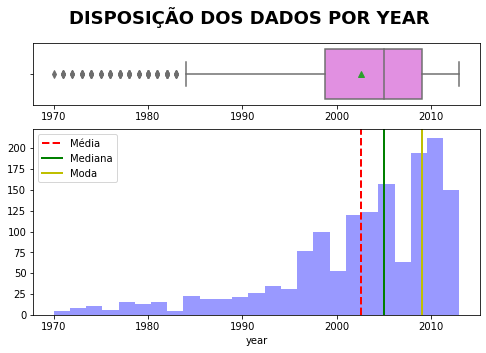

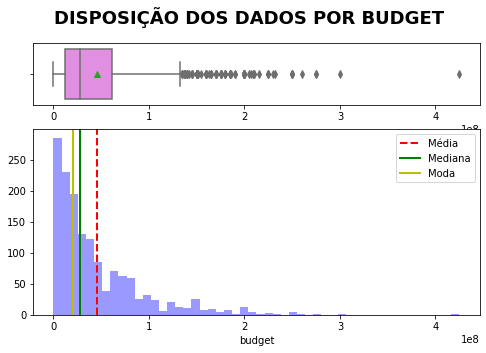

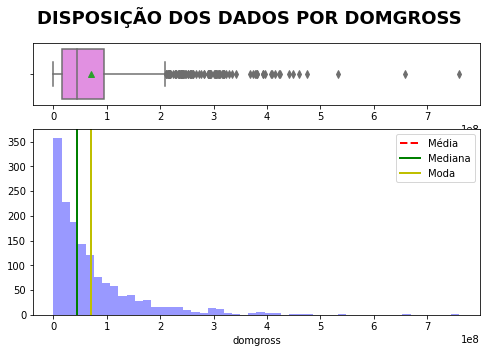

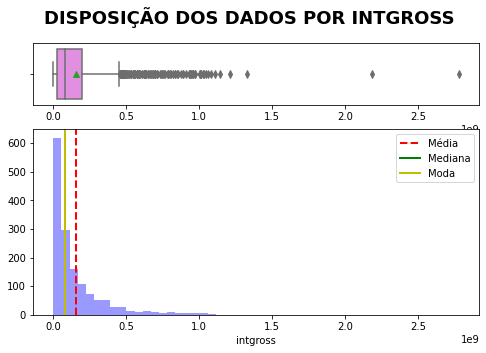

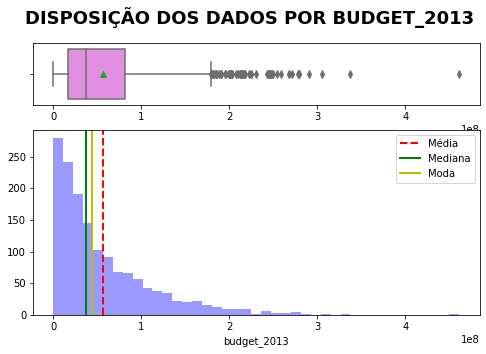

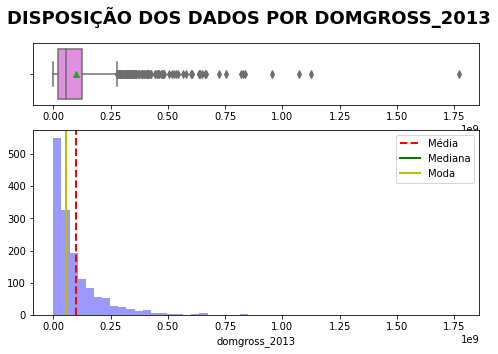

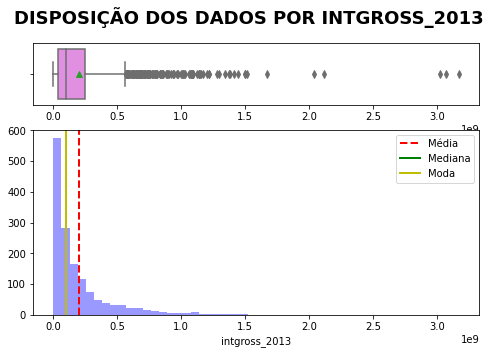

In [12]:
# Plotar o gráfico para cada coluna para verificar a disposição dos dados
list_col=  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

In [13]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'biry']].groupby(['biry'])[[var]].median().reset_index()
    return temp

In [15]:
# Analisando nossos dados com relação à incidência de diabetes
def plot_distribution(data_select, size_bin) :  
    # 2 datasets

    D = df[(df['biry'] != 0)]
    H = df[(df['biry'] == 0)]

    tmp1 = D[data_select]
    tmp2 = H[data_select]

    hist_data = [tmp1, tmp2]
    
    group_labels = ['Fail', 'Passy']
    colors = ['lightskyblue', 'gold']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

## Filmes por Ano


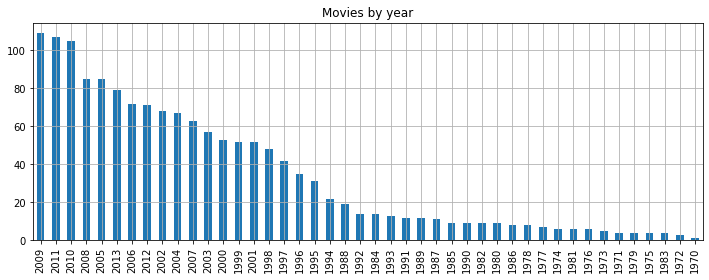

In [16]:
# distribution over years
plt.figure(figsize=(12,4))
df.year.value_counts().plot(kind='bar')
plt.title('Movies by year')
plt.grid()
plt.show()

## Percentual de PASS e FAIL por ano

In [17]:
# show corresponding table
df_pass_dev = pd.crosstab(df.year, df.binary)
df_pass_dev['n'] = df_pass_dev.FAIL + df_pass_dev.PASS
df_pass_dev['FAIL_perc'] = 100*np.round(df_pass_dev.FAIL / df_pass_dev.n,4)
df_pass_dev['PASS_perc'] = 100*np.round(df_pass_dev.PASS / df_pass_dev.n,4)
df_pass_dev

binary,FAIL,PASS,n,FAIL_perc,PASS_perc
year,,,,,
1970,0,1,1,0.00,100.00
1971,4,0,4,100.00,0.00
1972,2,1,3,66.67,33.33
1973,4,1,5,80.00,20.00
1974,4,2,6,66.67,33.33
1975,4,0,4,100.00,0.00
1976,4,2,6,66.67,33.33
1977,5,2,7,71.43,28.57
1978,6,2,8,75.00,25.00


In [18]:
# converter 'binary' em 0 e 1
df['binary'] = df['binary'].map({'PASS': 1, 'FAIL': 0})

## Top Movies

In [19]:
col_budget = 'budget_2013'
col_domgross = 'domgross_2013'
col_intgross = 'intgross_2013'

features_num = [col_budget, col_domgross, col_intgross]
features_num

['budget_2013', 'domgross_2013', 'intgross_2013']

In [20]:
n_top = 20
show_cols = ['year',  'binary'] + features_num

### Os Top 20 por investimento (By Budget)

In [21]:
df_top_b = df.nlargest(columns=[col_budget], n=n_top)
df_top_b[show_cols]

,year,binary,budget_2013,domgross_2013,intgross_2013
106,2009,0,461435929,825707158.0,3.022589e+09
6,2007,1,337063045,347647302.0,1.079721e+09
131,1971,0,305063707,404702718.0,6.168270e+08
1324,1997,1,290247625,955890356.0,3.171931e+09
987,2012,0,279025606,454699213.0,1.095144e+09
1377,2012,1,279025606,74128153.0,2.869176e+08
248,2010,1,277740279,214524387.0,6.266055e+08
1119,2009,1,271432899,327846641.0,1.014526e+09
154,2006,0,268144752,231297965.0,4.517707e+08
460,1995,0,267536405,134909008.0,4.039742e+08


## Criando nosso modelo

In [22]:
df.drop(columns='imdb',axis = 1,inplace=True)


In [23]:
df.head()

,year,budget,domgross,intgross,budget_2013,domgross_2013,intgross_2013,binary
0,1974,13000000,57300000.0,57300000.0,61408439,270669505.0,270669505.0,1
1,1982,10700000,74706019.0,121706019.0,25821968,180285645.0,293709241.0,1
2,2008,15000000,2203641.0,6379575.0,16233845,2384904.0,6904335.0,1
3,2011,12000000,16311571.0,22750356.0,12428289,16893744.0,23562334.0,1
4,2000,26000000,45506619.0,75763814.0,35175618,61566286.0,102501499.0,0


In [24]:
# separando as variáveis independentes da variável alvo
# X todas as colunas sem a coluna 'target_default
# y apenas a coluna 'target_default

X = df.drop(columns='binary', axis=1)
y = df['binary']

In [25]:
# importando o modelo de seleção - KFold
from sklearn.model_selection import KFold

# importando nossas metricas
from sklearn.metrics import accuracy_score

# importando nosso modelo de machine learning - XGBoost
from xgboost import XGBClassifier

# importando nossa biblioteca de funções matemáticas
import numpy as np

## Verificando nossa métrica com XGBClassifier

In [26]:
# Verificando nossa métrica com XGBClassifier
# Com 5 repetições para cada divisão dos dados em 3 splits

resultados = []
for rep in range(5):
  print ('Repetição :',rep)
  kf = KFold(n_splits=3, shuffle=True, random_state = rep)
  
  for linhas_treino, linhas_teste in kf.split(X):
    print('Treino :', linhas_treino.shape[0])
    print('Teste :', linhas_teste.shape[0])

    X_train, X_test = X.iloc[linhas_treino], X.iloc[linhas_teste]
    y_train, y_test = y.iloc[linhas_treino], y.iloc[linhas_teste]

    ml_model = XGBClassifier(learning_rate=0.1, 
                             n_estimators=100, 
                             max_depth=3, subsample=1.0, 
                             colsample_bytree=1.0, gamma=1, 
                             random_state=0, n_jobs=1) # 84.84
    ml_model.fit(X_train, y_train)

    p = ml_model.predict(X_test)

    acc = np.mean(y_test == p)

    resultados.append(acc)

    print()
    print('Acurácia',acc)
    print()

Repetição : 0
Treino : 1000
Teste : 500

Acurácia 0.556

Treino : 1000
Teste : 500

Acurácia 0.572

Treino : 1000
Teste : 500

Acurácia 0.578

Repetição : 1
Treino : 1000
Teste : 500

Acurácia 0.54

Treino : 1000
Teste : 500

Acurácia 0.55

Treino : 1000
Teste : 500

Acurácia 0.552

Repetição : 2
Treino : 1000
Teste : 500

Acurácia 0.534

Treino : 1000
Teste : 500

Acurácia 0.536

Treino : 1000
Teste : 500

Acurácia 0.592

Repetição : 3
Treino : 1000
Teste : 500

Acurácia 0.554

Treino : 1000
Teste : 500

Acurácia 0.566

Treino : 1000
Teste : 500

Acurácia 0.558

Repetição : 4
Treino : 1000
Teste : 500

Acurácia 0.544

Treino : 1000
Teste : 500

Acurácia 0.592

Treino : 1000
Teste : 500

Acurácia 0.548



In [27]:
# Nossa acurácia média
np.mean(resultados)

0.5581333333333334

## Regressão Logistica

In [28]:
# importar bibliotecas do modelo de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [29]:
# criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X, y)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(X, y) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 57.27


## Decision Tree

In [30]:
# criar um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X, y)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(X, y) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 59.73


# Gerando nosso resultado

In [31]:
# Importando o arquivo de teste
df_test = pd.read_csv('/content/test.csv')

In [32]:
# Removendo a coluna imdb
df_test.drop(columns='imdb', axis=1, inplace=True)

In [33]:
# Tratando os valores nulos
df_test['budget'].fillna(df_test['budget'].mean(), inplace = True)
df_test['domgross'].fillna(df_test['domgross'].mean(), inplace = True)
df_test['intgross'].fillna(df_test['intgross'].median(), inplace = True)
df_test['budget_2013'].fillna(df_test['budget_2013'].median(), inplace = True)
df_test['domgross_2013'].fillna(df_test['domgross_2013'].median(), inplace = True)
df_test['intgross_2013'].fillna(df_test['intgross_2013'].median(), inplace = True)

In [34]:
# Nossos dados tratados
df_test.head()

,year,budget,domgross,intgross,budget_2013,domgross_2013,intgross_2013
0,2013,50000000,19452138.0,55940671.0,50000000,19452138.0,55940671.0
1,2013,40000000,57012977.0,66454811.0,40000000,57012977.0,66454811.0
2,2013,70000000,25213103.0,103813103.0,70000000,25213103.0,103813103.0
3,2013,195000000,65187603.0,197387603.0,195000000,65187603.0,197387603.0
4,2013,28000000,28795985.0,60839197.0,28000000,28795985.0,60839197.0


In [35]:
# Salvando nossos resultos de predição com Decision Tree
y_pred_lr = tree_model.predict(df_test)

submission = pd.DataFrame({
    "Resultado": y_pred_lr
})

# gerar arquivo csv
submission.to_csv('./Tree_model_submission_lr.csv', index=False)

In [36]:
y_pred_lr

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1])